In [1]:
#!pip install Bio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import islice
import random

import Bio

#1. Predobrada podataka

##1.1 Učitavanje podataka

In [4]:
from Bio import SeqIO
import gzip
from pathlib import Path


# Define file paths
# fasta_files = ['e-coli', 'salmonella-enterica', 'staphylococcus-aureus']
fasta_files = ['e-coli', 'salmonella-enterica', 'staphylococcus-aureus', 'acinetobacter-baumannii',
               'clostridioides-difficile', 'haemophilus-influenzae', 'mycobacterium-tuberculosis',
               'neisseria-meningitidis', 'pseudomonas-aeruginosa', 'streptococcus-pneumoniae']

seqs, ids, lengths, descs = [], [], [], []

fasta_dir = '/content/drive/MyDrive/sem3/'
for file in fasta_files:
    fasta_path = f'{fasta_dir}{file}.gz'
    with gzip.open(fasta_path, 'rt') as f:
        records = list(SeqIO.parse(f, 'fasta'))
        seqs.extend([str(record.seq) for record in records])
        ids.extend([record.id for record in records])
        lengths.extend([len(record.seq) for record in records])
        descs.extend([record.description for record in records])

In [5]:
names = ['E. coli', 'S. enterica', 'S. enterica (plasmid)', 'P. mirabilis', 'P. mirabilis (plasmid)',
         'A. baumanii', 'A. baumanii (plasmid)', 'C. difficile', 'C. difficile (plasmid)',
         'H. influenzae', 'M. tuberculosis', 'N. meningitidis', 'P. aeruginosa',
         'S. pneumoniae', 'S. pneumoniae (plasmid)']

In [6]:
# Create dataframe
data = {'Sequence': seqs, 'Id': ids, 'Length': lengths, 'Description': descs, 'Name': names}
df = pd.DataFrame(data)
display(df[:4])

,Sequence,Id,Length,Description,Name
0,AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATT...,NC_000913.3,4641652,NC_000913.3 Escherichia coli str. K-12 substr....,E. coli
1,AGAGATTACGTCTGGTTGCAAGAGATCATGACAGGGGGAATTGGTT...,NC_003197.2,4857450,NC_003197.2 Salmonella enterica subsp. enteric...,S. enterica
2,GAGTGAACGGATGAAACAGAAAGACCGTCTGTACGGCGTGGCACCG...,NC_003277.2,93933,NC_003277.2 Salmonella enterica subsp. enteric...,S. enterica (plasmid)
3,TCTGTAACTCCCCCTTATTAGTAGTAATATGTATACTACAATATAA...,NC_010554.1,4063606,"NC_010554.1 Proteus mirabilis HI4320, complete...",P. mirabilis


In [7]:
df = df.drop(df.index[[2, 4, 6, 8, 14]])

In [8]:
# Remove short sequences
df = df.sort_values('Name', ascending=True)
df = df.reset_index(drop=True)
display(df)

,Sequence,Id,Length,Description,Name
0,ATGCTTTGGACAGACTGCTTAACTCGCTTGCGACAAGAGCTCTCTG...,NZ_CP043953.1,3972439,NZ_CP043953.1 Acinetobacter baumannii strain K...,A. baumanii
1,ATGGATATAGTTTCTTTATGGGACAAAACCCTACAATTAATAAAAG...,NZ_CP076401.1,4089134,NZ_CP076401.1 Clostridioides difficile strain ...,C. difficile
2,AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATT...,NC_000913.3,4641652,NC_000913.3 Escherichia coli str. K-12 substr....,E. coli
3,AACGTCCGTCGTGGAGAGGGAAACAACCCAGACCGCCAGCTAAGGT...,NZ_CP007470.1,1846259,NZ_CP007470.1 Haemophilus influenzae strain 47...,H. influenzae
4,TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAACGCGG...,NC_000962.3,4411532,"NC_000962.3 Mycobacterium tuberculosis H37Rv, ...",M. tuberculosis
5,ATGACATTAGCAGAGTTTTGGCCGCTGTGCCTCCGCCGTCTTCACG...,NZ_CP021520.1,2157444,NZ_CP021520.1 Neisseria meningitidis strain 11...,N. meningitidis
6,TTTAAAGAGACCGGCGATTCTAGTGAAATCGAACGGGCAGGTCAAT...,NC_002516.2,6264404,"NC_002516.2 Pseudomonas aeruginosa PAO1, compl...",P. aeruginosa
7,TCTGTAACTCCCCCTTATTAGTAGTAATATGTATACTACAATATAA...,NC_010554.1,4063606,"NC_010554.1 Proteus mirabilis HI4320, complete...",P. mirabilis
8,AGAGATTACGTCTGGTTGCAAGAGATCATGACAGGGGGAATTGGTT...,NC_003197.2,4857450,NC_003197.2 Salmonella enterica subsp. enteric...,S. enterica
9,TTTTATCTCACAAGGTTATCCACTATGTTTTTCGATAAAAAGCTTA...,NZ_CP020549.1,2148350,NZ_CP020549.1 Streptococcus pneumoniae strain ...,S. pneumoniae


In [9]:
# Extract sequences as X and names as class labels y
X = df['Sequence']
y = df['Name']

In [10]:

print(X)

0    ATGCTTTGGACAGACTGCTTAACTCGCTTGCGACAAGAGCTCTCTG...
1    ATGGATATAGTTTCTTTATGGGACAAAACCCTACAATTAATAAAAG...
2    AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATT...
3    AACGTCCGTCGTGGAGAGGGAAACAACCCAGACCGCCAGCTAAGGT...
4    TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAACGCGG...
5    ATGACATTAGCAGAGTTTTGGCCGCTGTGCCTCCGCCGTCTTCACG...
6    TTTAAAGAGACCGGCGATTCTAGTGAAATCGAACGGGCAGGTCAAT...
7    TCTGTAACTCCCCCTTATTAGTAGTAATATGTATACTACAATATAA...
8    AGAGATTACGTCTGGTTGCAAGAGATCATGACAGGGGGAATTGGTT...
9    TTTTATCTCACAAGGTTATCCACTATGTTTTTCGATAAAAAGCTTA...
Name: Sequence, dtype: object


##1.2 Distribucija k-mera

In [11]:
import itertools

letters = ['A', 'C', 'G', 'T']
combinations = list(itertools.product(letters, repeat=3))
combinations = [''.join(c) for c in combinations]

print(combinations)

['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']


In [12]:
import itertools

def count_kmers(k, seq):

    letters = ['A', 'C', 'G', 'T']
    combinations = list(itertools.product(letters, repeat=k))
    combinations = [''.join(c) for c in combinations]
    kmers = {k: 0 for k in combinations}

    # count the number of kmer appearances in the sequence
    for i in range(len(seq) - k + 1):
        kmer = seq[i:i+k]
        if kmer in kmers:
            kmers[kmer] += 1

    # sort kmers by frequency of appearance
    sorted_kmers = {k: v for k, v in sorted(kmers.items(), key=lambda item: item[1], reverse=True)}
    return sorted_kmers

def get_distribution_vector(k, seq):
    kmer_counts = count_kmers(k, seq)
    scaled_kmers = scale_kmers(kmer_counts)
    sorted_kmers = {k: v for k, v in sorted(scaled_kmers.items(), key=lambda item: item[0], reverse=False)}
    return np.array(list(sorted_kmers.values()))

def scale_kmers(kmer_dict):
    total = sum(kmer_dict.values())
    scaled = {}
    for kmer, count in kmer_dict.items():
        scaled[kmer] = round(count / total, 5)
    return scaled

def plot_kmer_counts(kmer_dict):
    sorted_kmers = dict(sorted(kmer_dict.items()))
    x = list(sorted_kmers.keys())
    y = list(sorted_kmers.values())
    plt.bar(x, y)
    plt.xlabel('Kmer')
    plt.ylabel('Count')
    plt.xticks([])
    plt.show()

def get_top_n_kmers(kmer_dict, n=5):
  return dict(islice(kmer_dict.items(), n))

In [13]:
seq = 'ACCGCTAACCGT'
print(seq)
kmers = count_kmers(3, seq)
print(len(kmers))
scaled = scale_kmers(kmers)
print(scaled)
top_kmers = get_top_n_kmers(scaled, 10)
print(top_kmers)
distr_vec = get_distribution_vector(3, seq)
print(distr_vec)

ACCGCTAACCGT
64
{'ACC': 0.2, 'CCG': 0.2, 'AAC': 0.1, 'CGC': 0.1, 'CGT': 0.1, 'CTA': 0.1, 'GCT': 0.1, 'TAA': 0.1, 'AAA': 0.0, 'AAG': 0.0, 'AAT': 0.0, 'ACA': 0.0, 'ACG': 0.0, 'ACT': 0.0, 'AGA': 0.0, 'AGC': 0.0, 'AGG': 0.0, 'AGT': 0.0, 'ATA': 0.0, 'ATC': 0.0, 'ATG': 0.0, 'ATT': 0.0, 'CAA': 0.0, 'CAC': 0.0, 'CAG': 0.0, 'CAT': 0.0, 'CCA': 0.0, 'CCC': 0.0, 'CCT': 0.0, 'CGA': 0.0, 'CGG': 0.0, 'CTC': 0.0, 'CTG': 0.0, 'CTT': 0.0, 'GAA': 0.0, 'GAC': 0.0, 'GAG': 0.0, 'GAT': 0.0, 'GCA': 0.0, 'GCC': 0.0, 'GCG': 0.0, 'GGA': 0.0, 'GGC': 0.0, 'GGG': 0.0, 'GGT': 0.0, 'GTA': 0.0, 'GTC': 0.0, 'GTG': 0.0, 'GTT': 0.0, 'TAC': 0.0, 'TAG': 0.0, 'TAT': 0.0, 'TCA': 0.0, 'TCC': 0.0, 'TCG': 0.0, 'TCT': 0.0, 'TGA': 0.0, 'TGC': 0.0, 'TGG': 0.0, 'TGT': 0.0, 'TTA': 0.0, 'TTC': 0.0, 'TTG': 0.0, 'TTT': 0.0}
{'ACC': 0.2, 'CCG': 0.2, 'AAC': 0.1, 'CGC': 0.1, 'CGT': 0.1, 'CTA': 0.1, 'GCT': 0.1, 'TAA': 0.1, 'AAA': 0.0, 'AAG': 0.0}
[0.  0.1 0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.2 0

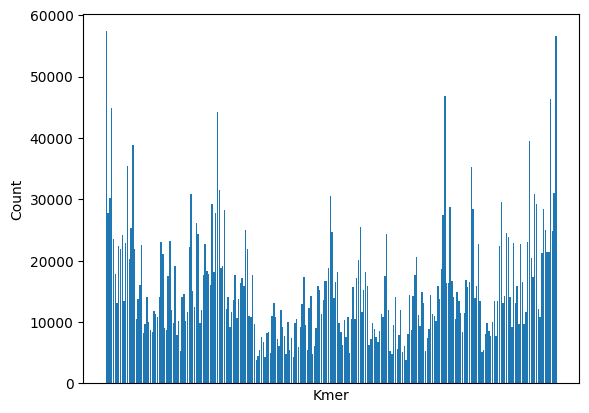

Top 5 kmers:  {'AAAA': 0.01444, 'TTTT': 0.01425, 'TAAA': 0.01178, 'TTTA': 0.01168, 'AAAT': 0.01131}


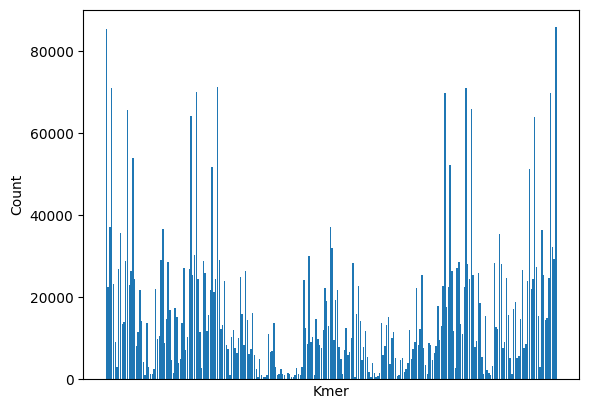

Top 5 kmers:  {'TTTT': 0.02096, 'AAAA': 0.02088, 'ATTT': 0.01744, 'TATA': 0.01738, 'AAAT': 0.01735}


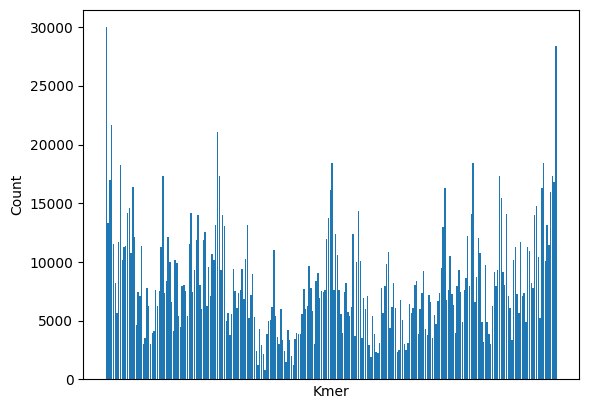

Top 5 kmers:  {'AAAA': 0.01419, 'TTTT': 0.01343, 'AAAT': 0.01028, 'ATTT': 0.00998, 'TTGA': 0.00873}


In [14]:
k = 4

# Distribucija k-mera za sekvencu e-coli
seq = X[0]
kmers_0 = count_kmers(k, seq)
plot_kmer_counts(kmers_0)
print("Top 5 kmers: ", get_top_n_kmers(scale_kmers(kmers_0)))

# Distribucija k-mera za sekvencu s-enterica
seq = X[1]
kmers_1 = count_kmers(k, seq)
plot_kmer_counts(kmers_1)
print("Top 5 kmers: ", get_top_n_kmers(scale_kmers(kmers_1)))

# Distribucija k-mera za sekvencu m-tuberculosis
seq = X[9]
kmers_9 = count_kmers(k, seq)
plot_kmer_counts(kmers_9)
print("Top 5 kmers: ", get_top_n_kmers(scale_kmers(kmers_9)))


##1.3 Generiranje očitanja

In [15]:
def generate_reading(seq, length=10000):
    start_index = random.randint(0, len(seq) - length)
    return seq[start_index:start_index + length]

def get_intersect(dict1, dict2):
    keys1 = set(dict1.keys())
    keys2 = set(dict2.keys())
    intersection = keys1.intersection(keys2)
    return list(intersection)

Generiramo očitanje duljine 10000 parova baza sa referentnog genoma e-coli

In [16]:
read_len = 10000
seq_0 = X[0]
read_0 = generate_reading(seq_0, length=read_len)

Računamo distribucije k-mera u generiranom očitanju i uspoređujemo s distribucijom u cijelom referentnom genomu

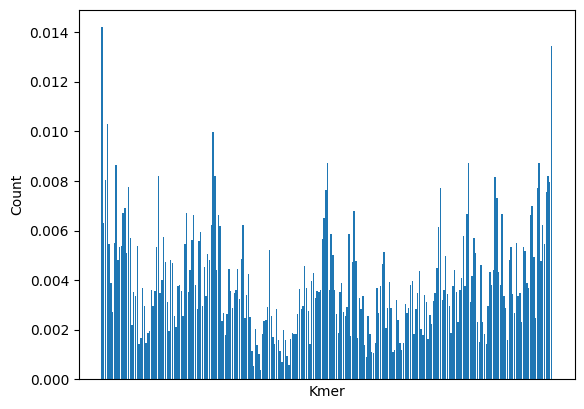

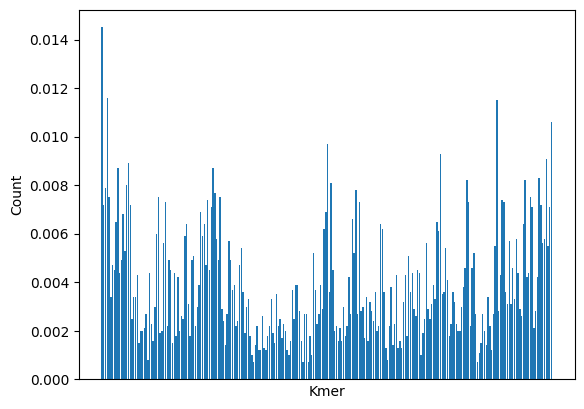

Top 5 kmers (ref. genome):
	 {'AAAA': 0.01419, 'TTTT': 0.01343, 'AAAT': 0.01028, 'ATTT': 0.00998, 'TTGA': 0.00873}
Top 5 kmers (reading):
	 {'AAAA': 0.0145, 'AAAT': 0.0116, 'TGAA': 0.0115, 'TTTT': 0.0106, 'GAAA': 0.0097}
Intersection:
	 ['AAAT', 'AAAA', 'TTTT']


In [17]:
k = 4

kmers_0 = scale_kmers(count_kmers(k, seq))
read_kmers_0 = scale_kmers(count_kmers(k, read_0))

plot_kmer_counts(kmers_0)
plot_kmer_counts(read_kmers_0)

top_kmers_0 = get_top_n_kmers(scale_kmers(kmers_0), n=5)
read_top_kmers_0 = get_top_n_kmers(scale_kmers(read_kmers_0), n=5)
intersect = get_intersect(top_kmers_0, read_top_kmers_0)

print("Top 5 kmers (ref. genome):\n\t", top_kmers_0)
print("Top 5 kmers (reading):\n\t", read_top_kmers_0)
print("Intersection:\n\t", intersect)

#<br><br>2. Klasifikacija pomoću distribucije k-mera

In [18]:
from numpy.linalg import norm

def classify_reading(reading, labels, distr_matrix, k=4, verbose=False, criterium='similarity', class_threshold=0.0):

    if verbose: print("Classifying reading...\n")
    if verbose: print(" Reading length: {}\n k-mer length: k={}\n".format(len(reading), k))

    read_distr = get_distribution_vector(k, reading)

    if (criterium == 'distance'):
        distances = [norm(read_distr - x_) for x_ in distr_matrix]

        if verbose: print("Distances:")
        if verbose: print(distances)

        min_index = distances.index(min(distances))
        return labels[min_index]

    elif (criterium == 'similarity'):
        cos_similarities = [np.dot(read_distr,x_)/(norm(read_distr)*norm(x_)) for x_ in distr_matrix]

        if verbose: print("Similarities:")
        if verbose: print(cos_similarities)

        if (max(cos_similarities) >= class_threshold):
            max_index = cos_similarities.index(max(cos_similarities))
            return labels[max_index]
        else:
            return 'unclassified'
    return None

In [19]:
k = 4 # Length of kmers

# Get the distribution matrix, where rows are kmer distribution vectors for different bacterias
distr_matrix = np.array(np.array([get_distribution_vector(k, seq) for seq in X]))
print(distr_matrix.shape)

(10, 256)


In [20]:
# Generate a reading
i = 3

read_len = 2000 # Length of generated readings
read = generate_reading(X[i], read_len)
correct_label = y[i]

pred_label = classify_reading(read, y, distr_matrix, k, verbose=True, class_threshold=0.8)

print("Correct label:", correct_label)
print("Predicted label:", pred_label)

Classifying reading...

 Reading length: 2000
 k-mer length: k=4

Similarities:
[0.8683480651394365, 0.9551253837785004, 0.6559869602579951, 0.8808770104462031, 0.29405526589508657, 0.6167262278694345, 0.2857399528222539, 0.8925070802295421, 0.6364136484536492, 0.833928586021786]
Correct label: H. influenzae
Predicted label: C. difficile


In [21]:
def generate_reading_set(ref_genomes, labels, n=100, read_len=10000, error_rate=0.0, random_reading_rate=0.0, verbose=False):
    """
    Generate a set of simulated sequencing reads from a set of reference genomes.

    Parameters:
        ref_genomes (Series of str): Series of reference genome sequences.
        n (int): Number of reads to generate.
        len (int): Length of each read.
        error_rate (float): Probability of an incorrect reading of each bases
        random_reading_rate (float): Percentage of entirely random readings in the set of all readings

    Returns:
        ndarray: Simulated sequencing reads and corresponding labels.
    """
    reads = np.array([])
    read_labels = np.array([])

    for i in range(n):

        # add a random reading not belonging to any bacteria in the dataset
        if random.random() < random_reading_rate:
            read = ''.join(random.choices(['A', 'C', 'G', 'T'], k=read_len))
            label = 'random'

        else:
            # choose a random reference genome to generate a reading from
            idx = random.randint(0, len(ref_genomes)-1)
            ref_genome = ref_genomes[idx]
            start_pos = random.randint(0, len(ref_genome) - read_len)
            read = ref_genome[start_pos:start_pos + read_len]
            label = labels[idx]

            # introduce errors, replace a percentage of all bases with an incorrect reading
            if (error_rate > 0.0):
                for j in range(read_len):
                    if random.random() < error_rate:
                        choices = ['A', 'C', 'G', 'T']
                        if (read[j] != 'N'): choices.remove(read[j])
                        if (j<read_len):
                            read = read[:j] + random.choice(choices) + read[j+1:]
                        else:
                            ead = read[:j] + random.choice(choices)

        reads = np.append(reads, read)
        read_labels = np.append(read_labels, label)

    if (verbose):
        random_count = (read_labels == 'random').sum()
        print("Generirano {} očitanja.".format(n))
        print("\tBroj nasumičnih očitanja: {}.".format(random_count))
        print("\tStopa pogreške: {}\n". format(error_rate))
    return reads, read_labels

In [22]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
def test_classifier(labels, readings, read_labels, distr_matrix, k, class_threshold=0.0, verbose=False):

    predicted_labels = np.array([])
    true_labels = np.array([])
    unclassified = np.array([])
    for i in range(0, len(readings)):
        reading = readings[i]
        predicted_label = classify_reading(reading, labels, distr_matrix, k, class_threshold=class_threshold)
        if (predicted_label == 'unclassified'):
            unclassified = np.append(unclassified, i)
        else:
          predicted_labels = np.append(predicted_labels, predicted_label)
          true_labels = np.append(true_labels, read_labels[i])
    if (verbose):
        print("Duljina k-mera:", k)
        print("Neklasificirana očitanja: {}/{}\n".format(len(unclassified), len(readings)))
        print(classification_report(true_labels, predicted_labels))
        ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, xticks_rotation='vertical')
    unclassified_percentage = len(unclassified) / len(readings)
    return accuracy_score(true_labels, predicted_labels), unclassified_percentage

In [23]:
k = 5
distr_matrix = np.array(np.array([get_distribution_vector(k, seq) for seq in X]))

In [24]:
read_len = 3000
readings, read_labels = generate_reading_set(X, y, 1000, read_len, error_rate=0.0)

Duljina k-mera: 5
Neklasificirana očitanja: 46/1000

                 precision    recall  f1-score   support

    A. baumanii       0.85      0.85      0.85        79
   C. difficile       0.78      1.00      0.87        94
        E. coli       0.86      0.89      0.87       101
  H. influenzae       0.93      0.92      0.93        91
M. tuberculosis       1.00      1.00      1.00       112
N. meningitidis       1.00      0.90      0.95        79
  P. aeruginosa       1.00      1.00      1.00       103
   P. mirabilis       0.89      0.88      0.88       104
    S. enterica       0.88      0.80      0.84       100
  S. pneumoniae       1.00      0.88      0.94        91

       accuracy                           0.91       954
      macro avg       0.92      0.91      0.91       954
   weighted avg       0.92      0.91      0.91       954



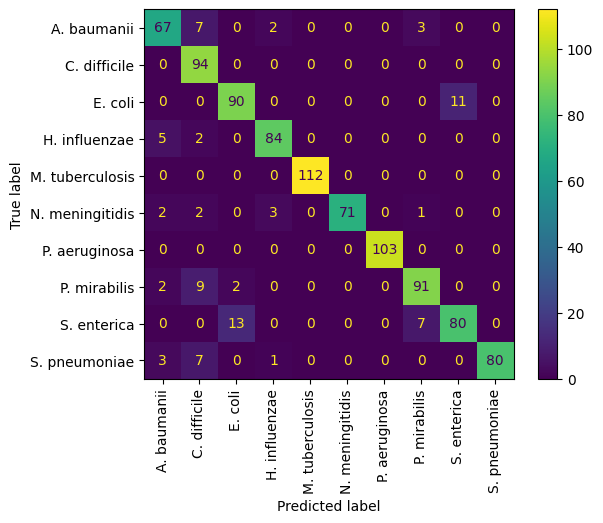

In [25]:
acc,_ = test_classifier(y, readings, read_labels, distr_matrix, k, class_threshold=0.8, verbose=True)

### Performanse za različite duljine očitanja

In [26]:

for read_len in [2000, 3000, 4000]:
    accuracies = []
    for i in range(1,10):
        readings, read_labels = generate_reading_set(X, y, 1000, read_len, error_rate=0.0)
        acc,_ = test_classifier(y, readings, read_labels, distr_matrix, k, class_threshold=0.0, verbose=False)
        accuracies.append(acc)
    mean_acc = np.mean(accuracies)
    print("duljina očitanja\t", read_len)
    print("srednja točnost\t", mean_acc)
    print()

duljina očitanja	 2000
srednja točnost	 0.8787777777777779

duljina očitanja	 3000
srednja točnost	 0.894888888888889

duljina očitanja	 4000
srednja točnost	 0.9145555555555556



### Performanse za očitanja s greškom

In [27]:
for error_rate in [0.01, 0.02, 0.05, 0.1]:
    accuracies = []
    unclass_percentages = []
    for i in range(1,10):
        readings, read_labels = generate_reading_set(X, y, 1000, 3000, error_rate=error_rate)
        acc, unclass_percentage = test_classifier(y, readings, read_labels, distr_matrix, k, class_threshold=0.8, verbose=False)
        accuracies.append(acc)
        unclass_percentages.append(unclass_percentage)

    mean_acc = np.mean(accuracies)
    mean_unclass_perc = np.mean(unclass_percentages)
    print("stopa pogreške\t\t\t", error_rate)
    print("srednja točnost\t\t\t", mean_acc)
    print("srednji br. neklas. očitanja\t", mean_unclass_perc)
    print()

stopa pogreške			 0.01
srednja točnost			 0.9088373582713815
srednji br. neklas. očitanja	 0.036000000000000004

stopa pogreške			 0.02
srednja točnost			 0.9103917796998222
srednji br. neklas. očitanja	 0.036666666666666674

stopa pogreške			 0.05
srednja točnost			 0.9038731463450564
srednji br. neklas. očitanja	 0.027777777777777776

stopa pogreške			 0.1
srednja točnost			 0.8731641364008288
srednji br. neklas. očitanja	 0.02222222222222222



## Matrica sličnosti

In [28]:
def plot_similarity_matrix(X, y):
    # Create a new figure and axis for the plot
    fig, ax = plt.subplots()

    # Create a heatmap using matplotlib
    heatmap = ax.pcolor(X, cmap='viridis')

    # Set the title and labels for the chart
    ax.set_title('Matrica sličnosti')
    ax.set_xticks(np.arange(X.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(X.shape[1]) + 0.5, minor=False)
    ax.set_xticklabels(y, minor=False)
    ax.set_yticklabels(y, minor=False)

    # Rotate labels along x-axis for visibility
    plt.xticks(rotation=90)

    #invert x-axis
    plt.gca().invert_yaxis()

    # Add a color bar for the heatmap
    plt.colorbar(heatmap)

    plt.show()

[[1.         0.88356044 0.83871118 0.97770052 0.45614323 0.78439262
  0.42952331 0.97761362 0.79747134 0.95075815]
 [0.88356044 1.         0.60957122 0.8806164  0.2106682  0.56472034
  0.20329364 0.89759552 0.58226194 0.85865031]
 [0.83871118 0.60957122 1.         0.82415827 0.78608259 0.91700855
  0.77369869 0.84064266 0.98761448 0.81336323]
 [0.97770052 0.8806164  0.82415827 1.         0.43222478 0.78989111
  0.4014494  0.97265511 0.7857563  0.93568313]
 [0.45614323 0.2106682  0.78608259 0.43222478 1.         0.77451292
  0.95261821 0.45619622 0.82071133 0.43696248]
 [0.78439262 0.56472034 0.91700855 0.78989111 0.77451292 1.
  0.74396087 0.76815496 0.92086206 0.77185873]
 [0.42952331 0.20329364 0.77369869 0.4014494  0.95261821 0.74396087
  1.         0.42562611 0.81929351 0.4208956 ]
 [0.97761362 0.89759552 0.84064266 0.97265511 0.45619622 0.76815496
  0.42562611 1.         0.80671436 0.93553268]
 [0.79747134 0.58226194 0.98761448 0.7857563  0.82071133 0.92086206
  0.81929351 0.80671

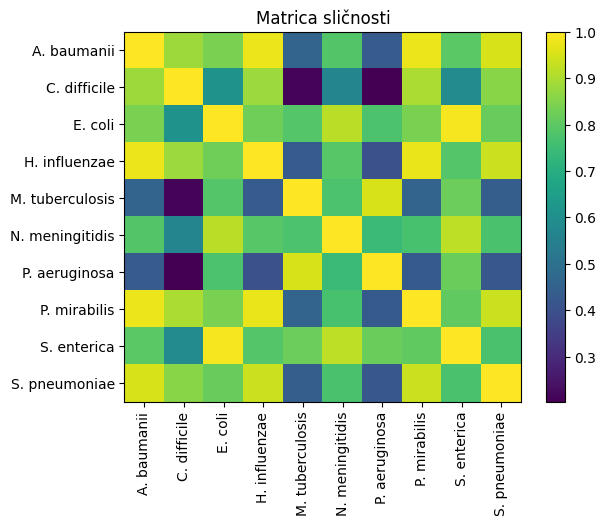

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(distr_matrix)
print(sim_matrix)

plot_similarity_matrix(sim_matrix, y.to_numpy())

[tekst veze](https://)## Klasifikacija skupa očitanja

In [30]:
display(df)

,Sequence,Id,Length,Description,Name
0,ATGCTTTGGACAGACTGCTTAACTCGCTTGCGACAAGAGCTCTCTG...,NZ_CP043953.1,3972439,NZ_CP043953.1 Acinetobacter baumannii strain K...,A. baumanii
1,ATGGATATAGTTTCTTTATGGGACAAAACCCTACAATTAATAAAAG...,NZ_CP076401.1,4089134,NZ_CP076401.1 Clostridioides difficile strain ...,C. difficile
2,AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATT...,NC_000913.3,4641652,NC_000913.3 Escherichia coli str. K-12 substr....,E. coli
3,AACGTCCGTCGTGGAGAGGGAAACAACCCAGACCGCCAGCTAAGGT...,NZ_CP007470.1,1846259,NZ_CP007470.1 Haemophilus influenzae strain 47...,H. influenzae
4,TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAACGCGG...,NC_000962.3,4411532,"NC_000962.3 Mycobacterium tuberculosis H37Rv, ...",M. tuberculosis
5,ATGACATTAGCAGAGTTTTGGCCGCTGTGCCTCCGCCGTCTTCACG...,NZ_CP021520.1,2157444,NZ_CP021520.1 Neisseria meningitidis strain 11...,N. meningitidis
6,TTTAAAGAGACCGGCGATTCTAGTGAAATCGAACGGGCAGGTCAAT...,NC_002516.2,6264404,"NC_002516.2 Pseudomonas aeruginosa PAO1, compl...",P. aeruginosa
7,TCTGTAACTCCCCCTTATTAGTAGTAATATGTATACTACAATATAA...,NC_010554.1,4063606,"NC_010554.1 Proteus mirabilis HI4320, complete...",P. mirabilis
8,AGAGATTACGTCTGGTTGCAAGAGATCATGACAGGGGGAATTGGTT...,NC_003197.2,4857450,NC_003197.2 Salmonella enterica subsp. enteric...,S. enterica
9,TTTTATCTCACAAGGTTATCCACTATGTTTTTCGATAAAAAGCTTA...,NZ_CP020549.1,2148350,NZ_CP020549.1 Streptococcus pneumoniae strain ...,S. pneumoniae


In [31]:
def classify_reading_set(readings, distr_matrix, k, labels, class_threshold=0.0):
    """
    Classify all readings in a given set.

      Parameters:
          readings (ndarray): Numpy array of generated readings.
          distr_matrix (ndarray): 2d numpy array where rows are distribution vectors for each bacteria in the dataset.
          labels (Series of str): Labels of bacteriae in the dataset.
          class_threshold=maximum d

      Returns:
          predicted_labels (ndarray): Predicted labels of readings in the set
          found_genomes (dict): The number of each type of bacteria in the given reading set
    """
    found_genomes = {}
    predicted_labels = np.array([])
    for reading in readings:
          label = classify_reading(reading, labels, distr_matrix, k, class_threshold=class_threshold)
          predicted_labels = np.append(predicted_labels, label)
          if label in found_genomes:
              found_genomes[label] += 1
          else:
              found_genomes[label] = 1

    return sorted(found_genomes.items(), key=lambda x: x[1], reverse=True), predicted_labels

def plot_results(found_genomes):

    keys = np.array([x[0] for x in found_genomes])
    values = np.array([x[1] for x in found_genomes])

    bars = plt.bar(keys, values)
    plt.bar_label(bars)

    plt.title('Pronađene bakterije')
    plt.xlabel('Vrsta bakterije')
    plt.ylabel('Broj očitanja')

    plt.xticks(rotation=90)

    # Show the chart
    plt.show()

In [32]:
present_bacteriae = np.array([X[1], X[0], X[2], X[4]])
read_len = 3000
readings, read_labels = generate_reading_set(present_bacteriae, y, 1000, read_len, error_rate=0.00, random_reading_rate=0.1)

In [33]:
k = 5
distr_matrix = np.array(np.array([get_distribution_vector(k, seq) for seq in X]))

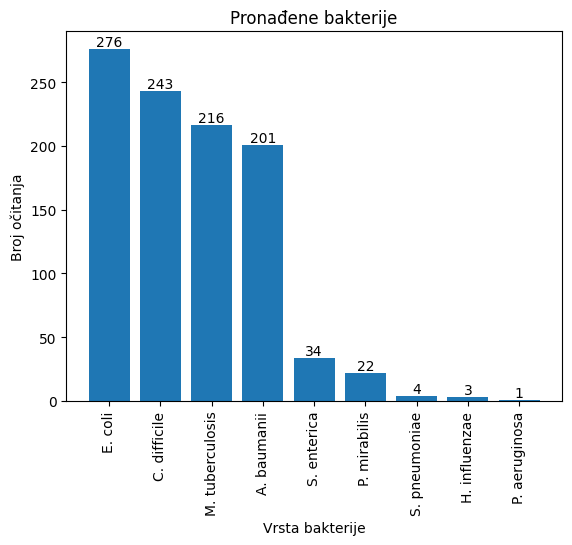

In [34]:
found_genomes,_ = classify_reading_set(readings, distr_matrix, k, y, 0.0)

plot_results(found_genomes)

##<br><br>3. Klasifikacija modela korištenjem neuronske mreže

In [35]:
for i in range (10):
  print(X[i][:30],"\t", y[i])

ATGCTTTGGACAGACTGCTTAACTCGCTTG 	 A. baumanii
ATGGATATAGTTTCTTTATGGGACAAAACC 	 C. difficile
AGCTTTTCATTCTGACTGCAACGGGCAATA 	 E. coli
AACGTCCGTCGTGGAGAGGGAAACAACCCA 	 H. influenzae
TTGACCGATGACCCCGGTTCAGGCTTCACC 	 M. tuberculosis
ATGACATTAGCAGAGTTTTGGCCGCTGTGC 	 N. meningitidis
TTTAAAGAGACCGGCGATTCTAGTGAAATC 	 P. aeruginosa
TCTGTAACTCCCCCTTATTAGTAGTAATAT 	 P. mirabilis
AGAGATTACGTCTGGTTGCAAGAGATCATG 	 S. enterica
TTTTATCTCACAAGGTTATCCACTATGTTT 	 S. pneumoniae


Mapiranje svakog slova u one-hot-encoding vektor.

In [36]:
import numpy as np

print("Mapiranje A,C,T,G u one-hot-encoding...\n")
one_hot_X = []

sequence_mapping = {'A': [1, 0, 0, 0],
                    'C': [0, 1, 0, 0],
                    'T': [0, 0, 1, 0],
                    'G': [0, 0, 0, 1]}

for i, sequence in enumerate(X):

  one_hot_sequence = []
  print(f"Duljina {i+1}. sekvence: {len(sequence)}")

  for letter in sequence:
      one_hot_sequence.append(sequence_mapping.get(letter, [0, 0, 0, 0]))  # Default na [0, 0, 0, 0] ako slovo nije A, C, T ili G

  one_hot_X.append(one_hot_sequence)


Popunjavanje_nulama = 0

if (Popunjavanje_nulama):
  print("\nIzjednačavanje duljina sekvenci i popunjavanje nulama\n")
  max_sequence_len = max(len(seq) for seq in X)

  for seq in one_hot_X:
    if(len(seq) < max_sequence_len):
      diff = max_sequence_len - len(seq)

      for i in range (diff):
        seq.append([0,0,0,0])

      print(len(seq))


Mapiranje A,C,T,G u one-hot-encoding...

Duljina 1. sekvence: 3972439
Duljina 2. sekvence: 4089134
Duljina 3. sekvence: 4641652
Duljina 4. sekvence: 1846259
Duljina 5. sekvence: 4411532
Duljina 6. sekvence: 2157444
Duljina 7. sekvence: 6264404
Duljina 8. sekvence: 4063606
Duljina 9. sekvence: 4857450
Duljina 10. sekvence: 2148350


Rezanje sekvenci na manje podsekvence.

In [37]:
slice_len = 5000

X_extended_onehot = []
y_extended_onehot = []

for j, seq in enumerate(one_hot_X):

  for i in range (len(seq)//slice_len):

    rp = seq[i*slice_len:(i+1)*slice_len]
    rp = np.array(rp).flatten()
    X_extended_onehot.append(rp)

    y_extended = [0] * 10
    y_extended[j] = 1
    y_extended_onehot.append(y_extended)


In [38]:
print(f"\nNove dimenzije: {len(X_extended_onehot)}×{len(X_extended_onehot[0])}\n\n")

print("Skup podataka:")
for i in range (11):
  print(X_extended_onehot[i][:28],"\t",y_extended_onehot[i])
print("...")


Nove dimenzije: 7685×20000


Skup podataka:
[1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1] 	 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 

In [39]:
lis = [0]*10

for line in (y_extended_onehot):
  pp = np.argmax(line)
  lis[pp] = lis[pp]+1

print()
for i in range (len(lis)):
  print(f"Broj primjeraka {i+1}. klase: {lis[i]}")


Broj primjeraka 1. klase: 794
Broj primjeraka 2. klase: 817
Broj primjeraka 3. klase: 928
Broj primjeraka 4. klase: 369
Broj primjeraka 5. klase: 882
Broj primjeraka 6. klase: 431
Broj primjeraka 7. klase: 1252
Broj primjeraka 8. klase: 812
Broj primjeraka 9. klase: 971
Broj primjeraka 10. klase: 429


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_extended_onehot, y_extended_onehot, test_size=0.2, random_state=42)

#print(len(X_train), len(X_test))
print()

In [41]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def calculate_loss(output, y_true):
    m = np.array(y_true).shape[0]
    log_likelihood = -np.log(output[range(m), y_true])
    loss = np.sum(log_likelihood) / m
    return loss

def update_weights(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate=0.01):
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    return w1, b1, w2, b2

def forward_propagation(X):
    z1 = np.dot(X, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    output = softmax(z2)

    return a1, output

def backward_propagation(X, Y, a1, output):
    X, Y = np.array(X), np.array(Y)
    m = X.shape[0]

    dz2 = output - Y
    dw2 = (1 / m) * np.dot(a1.T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, w2.T) * relu_derivative(a1)

    dw1 = (1 / m) * np.dot(X.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

    return dw1, db1, dw2, db2


def train(X_train, y_train, weigths, epochs=15, batch_size = 400):
    w1, b1, w2, b2 = weigths[0], weigths[1], weigths[2], weigths[3]

    num_batches = len(X_train)//batch_size
    rest_of_batch = len(X_train)%batch_size

    for i in range (num_batches):
      X_batch = X_train[i*batch_size:(i+1)*batch_size]
      y_batch = y_train[i*batch_size:(i+1)*batch_size]

      np = len(X_batch)

      for epoch in range(epochs):

          a1, output = forward_propagation(X_batch)

          dw1, db1, dw2, db2 = backward_propagation(X_batch, y_batch, a1, output)

          w1, b1, w2, b2 = update_weights(w1, b1, w2, b2, dw1, db1, dw2, db2)
      print(f"batch: {i+1}/{num_batches}")

    X_batch = X_train[-rest_of_batch:]
    y_batch = y_train[-rest_of_batch:]
    np = len(X_batch)

    for epoch in range(epochs):

        a1, output = forward_propagation(X_batch)

        dw1, db1, dw2, db2 = backward_propagation(X_batch, y_batch, a1, output)

        w1, b1, w2, b2 = update_weights(w1, b1, w2, b2, dw1, db1, dw2, db2)

    return w1, b1, w2, b2

def evaluate(y_pred, y_test): # both are one-hot-encoded vectors
  y_pred_corr = 0
  ukup = len(y_test)

  if (len(y_pred) != len(y_test)):
    print(f"{len(y_pred)} is different from {len(y_test)}")

  for i in range (ukup):
    a = np.argmax(output[i])
    b = np.argmax(y_test[i])
    y_pred_corr = y_pred_corr+1 if (a == b) else y_pred_corr
  print(f"{y_pred_corr}/{ukup}")

In [42]:
input_size = slice_len * 4
hidden_size = 150
output_size = 10

#np.random.seed(55)

w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [43]:

batch_size = 400
weigths = [w1, b1, w2, b2]
w1, b1, w2, b2 = train(X_train, y_train, weigths)

print("\nnetwork is done learning")

batch: 1/15
batch: 2/15
batch: 3/15
batch: 4/15
batch: 5/15
batch: 6/15
batch: 7/15
batch: 8/15
batch: 9/15
batch: 10/15
batch: 11/15
batch: 12/15
batch: 13/15
batch: 14/15
batch: 15/15

network is done learning


In [44]:
_, output = forward_propagation(X_test)

print("Točnost na X_test skupu:")
evaluate(output, y_test)

Točnost na X_test skupu:
403/1537
